# Training Models

In this chapter we will learn Linear Regression mode. It has two different ways to train:
- Using a direct "closed-form" equation that directly computes the model parameters
- Using an iterative optimization approach called Gradient Descent (GD) that gradually tweaks the model parameters to minimize the cost function.

We will also learn Polynomial Regression, a more complex model that can fit nonlinear datasets.

And finally we will learn two more models for classification tasks: Logistic Regression and Softmax Regression.

# Linear Regression

Equation for Linear Regression model prediction:

$\hat{y} = θ_0 + θ_1x_1 + θ_2x_2 + ⋯ + θ_nx_n$

In this equation:
- $\hat{y}$ is the predicted value
- $n$ is the number of features
- $x_i$ is the $i^{th}$ feature value
- $θ_j$ is the $j^{th}$ model parameter (including the bias term $θ_0$ and the feature weights $θ_1,θ_2,...,θ_n$

This can be written much more concisely using a vectorized form

$\hat{y} = h_θ(x) = θ \cdot x $

In this equation:
- $θ$ is the model's parameter vector, containing the bias term $θ_0$ and the feature weight $θ_1$to $θ_n$
- $x$ is the instance's feature vector, containing $x_0$to $x_n$, with $x_0$ always equal to 1
- $θ \cdot x$ is the dot product of the vectors $θ$ and $x$, which is equal to $θ_0 + θ_1x_1 + θ_2x_2 + ⋯ + θ_nx_n$
- $h_θ$ is the hypothesis function, using the model parameters $θ$

We will use mean square error (MSE) for performance measurement of the model.

$MSE(X, h_θ) = MSE(θ) = \frac{1}{m} \sum_{i=1}^m \biggl(θ^Tx^{(i)}-y^{(i)}\biggr)^2$


## The Normal Equation
The normal equation using mathematical equation to find the value of $θ$ that minimizes the cost function.

$\hat{θ}=(X^TX)^{-1}X^Ty$

In this equation:
- $\hat{θ}$ is the value of $θ$ that minimizes the cost function
- $y$ is the vector of target values containing $y_1$to $y_m$

In [1]:
# let's test the equation
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

<Figure size 640x480 with 1 Axes>

Now lets compute $\hat{θ}$

In [3]:
X_b = np.c_[np.ones((100, 1)), X]    # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.24002288],
       [3.0331963 ]])

We would hoped for $θ_0=4$ and $θ_1=3$ instead of $θ_0=3.94$ and $θ_1=3.05$. The noise made it impossible to recover the exact parameters.

In [4]:
# we can make prediction with teta cap
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.24002288],
       [10.30641549]])

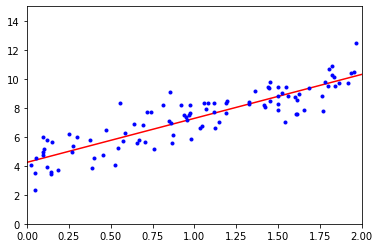

In [5]:
# let's plot this model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
# linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.24002288]), array([[3.0331963]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.24002288],
       [10.30641549]])

In [8]:
# lstq = least squares
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.24002288],
       [3.0331963 ]])

The function $\hat{θ}=X^+y$, where $X^+$ is the *pseudoinverse* of $X$ (the Moore-Penrose inverse).

In [9]:
# we can use pinv()
np.linalg.pinv(X_b).dot(y)

array([[4.24002288],
       [3.0331963 ]])

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices $UΣV^T$.

The pseudoinverse is computed as $X^+=VΣ^+U^T$.
- To compute the matrix $Σ^+$, the algorithm takes $Σ$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix.

This approach is more efficient that computing the Normal Equation.

## Computational Complexity

The Normal Equation computes the inverse of $X^TX$, which is an $(n+1)x(n+1)$ matrix where *n* is the number of features.

The *computational complexity* of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$, depending on the implementation.

# Gradient Descent
*Gradient Descent* is a generic optimization algorithm capable of finding optimal solution to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

There are two main challenges with Gradient Descent. If the random initialization starts the algorithm in the left, then it will converge to a *local minimum*, which is not as good as the *global minimum*. If it starts on the right, then it will take a very long time to cross the plateau. And if you stop too early, you will never reach the global minimum.

Fortunately, the MSE cost function for a Linear Regression model happens to be a *convex function*, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. So, there is only one global minimum.

The more parameters a model has, the more dimensions this space has, and the harder the search is.

## Batch Gradient Descent
We need to calculate how much the cost function will change if we change $θ_j$ just a little bit called *partial derivative*.

Partial derivatives of the cost function equation:

$$\frac{∂}{∂θ_j}MSE(θ)=\frac{2}{m}\sum_{i=1}^m (θ^Tx^{(i)}-y^{(i)}) x^{(i)}_j$$

Instead of computing individually, we can compute them all in one go.

$$∇_θMSE(θ)=\frac{2}{m}X^T(Xθ-y)$$

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $∇_θMSE(θ)$ from $θ$. This is where the learning rate $η$ comes into play: multiply the gradient vector by $η$ to determine the size of the downhill step.

$$θ^{(next \ step)}=θ-η∇_θMSE(θ)$$

In [10]:
# let's implement it
eta = 0.1 # learning rate
n_iterations = 1000
m = 1000

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.18651252],
       [3.07799091]])

In [11]:
# let's try different learning rate
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

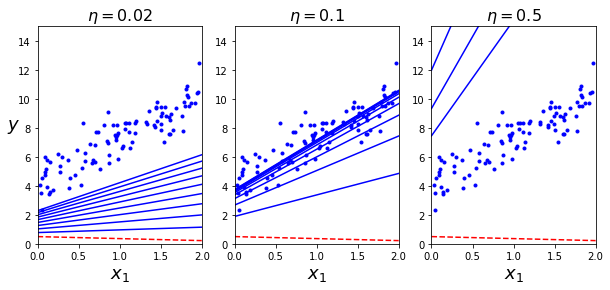

In [12]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

- On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time.
- In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution.
- On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further from the solution at avery step.

Then how to set a good number of iterations?
A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny, when its norm becomes smaller than a tiny number ϵ (callend *tolerance*)--because this happens when Gradient Descent has (almost) reached the minimum.

## Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute gradients at every step, which makes it very slow when the training set is large.

SGD picks a random instance in the training set at every step and computes the gradients based only on that single instance. On the other hand, due to its stochastic (i.e. random) nature, the cost function will bounce up and down, decreasing only on average. 

Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to *simulated annealing*, an algorithm inspired from the process in metallurgy of annealing, where molten metal is slowly cooled down.

The function that determines the learning rate at each iteration is called *learning schedule*. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [13]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

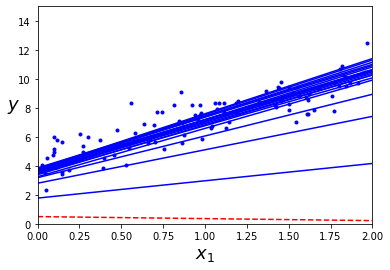

In [14]:
# learning schedule
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

In [15]:
theta

array([[4.23345342],
       [3.02810836]])

When using SGD, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average.

A simple way to ensure this is to shuffle the instances during training. If you do not shuffle the instances—for example, if the instances are sorted by label—then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.279179]), array([3.07816718]))

## Mini-batch Gradient Descent
In *Mini-batch Gradient Descent*: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), it computes the gradients on small random sets of instances called *mini-batch*. The main advantage is that we can get a performance boost from hardware optimization of matrix operations.

In [18]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [19]:
theta

array([[4.15258173],
       [2.92994202]])

In [20]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

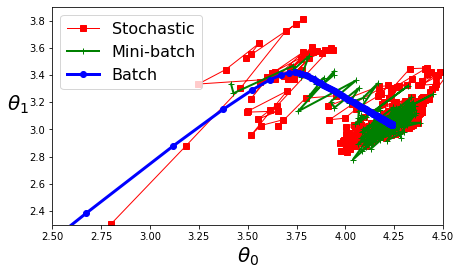

In [21]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

Comparison of algorithms for Linear Regression

| Algorithm       	| Large m 	| Out-of-core support 	| Large n 	| Hyperparams 	| Scaling required 	| Scikit-learn     	|
|-----------------	|---------	|---------------------	|---------	|-------------	|------------------	|------------------	|
| Normal Equation 	| Fast    	| No                  	| Slow    	| 0           	| No               	| N/A              	|
| SVD             	| Fast    	| No                  	| Slow    	| 0           	| No               	| LinearRegression 	|
| Batch GD        	| Slow    	| No                  	| Fast    	| 2           	| Yes              	| SGDRegressor     	|
| Stochastic GD   	| Fast    	| Yes                 	| Fast    	| >=2         	| Yes              	| SGDRegressor     	|
| Mini-batch GD   	| Fast    	| Yes                 	| Fast    	| >=2         	| Yes              	| SGDRegressor     	|